## Dependency Installation

In [1]:
import mysql.connector
import pandas as pd
import math
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

## Database Connectivity

In [2]:
def mysqlConnector(table, database = "foodhunter"):
    try:
        connection = mysql.connector.connect(host = "localhost", user = "root", password = "root")
        cur = connection.cursor()
        cur.execute(f"SELECT * FROM {database}.{table}")
        data = cur.fetchall()
        columns = [meta[0] for meta in cur.description]
    except Exception as e:
        print("> Error Occured : ", e)
    else:
        print("> Connection Successful!")
    finally:
        return data, columns
        connection.close()

In [3]:
data, columns = mysqlConnector("orders")
orders = pd.DataFrame(data, columns = columns)

data, columns = mysqlConnector("customers")
customers = pd.DataFrame(data, columns = columns)

data, columns = mysqlConnector("orders_items")
orders_items = pd.DataFrame(data, columns = columns)

data, columns = mysqlConnector("drivers")
drivers = pd.DataFrame(data, columns = columns)

data, columns = mysqlConnector("food_items")
fooditems = pd.DataFrame(data, columns = columns)

data, columns = mysqlConnector("restaurants")
restaurants = pd.DataFrame(data, columns = columns)

> Connection Successful!
> Connection Successful!
> Connection Successful!
> Connection Successful!
> Connection Successful!
> Connection Successful!


## Table Exploration

### Orders

In [4]:
orders.head()

,order_id,customer_id,order_date,order_time,delivered_date,delivered_time,delivery_address,driver_id,total_price,delivery_fee,discount,final_price,order_rating
0,1,7420,2022-06-01,0 days 00:03:00,2022-06-01,0 days 00:16:00,7 Cedar Lane,93,150,0.0,30.0,120.0,3.555464
1,2,1895,2022-06-01,0 days 00:04:00,2022-06-01,0 days 00:18:00,7 Lexington Place,138,9,5.0,0.0,14.0,5.000000
2,3,6651,2022-06-01,0 days 00:05:00,2022-06-01,0 days 00:20:00,20 Linden Lane,187,117,0.0,23.4,93.6,3.393489
3,4,9032,2022-06-01,0 days 00:05:00,2022-06-01,0 days 00:24:00,6 Rosedale Avenue,10,105,0.0,21.0,84.0,5.000000
4,5,2479,2022-06-01,0 days 00:06:00,2022-06-01,0 days 00:34:00,36 Cherrywood Lane,219,27,2.5,5.4,24.1,3.793048


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43118 entries, 0 to 43117
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   order_id          43118 non-null  int64          
 1   customer_id       43118 non-null  int64          
 2   order_date        43118 non-null  datetime64[ns] 
 3   order_time        43118 non-null  timedelta64[ns]
 4   delivered_date    43118 non-null  object         
 5   delivered_time    43118 non-null  timedelta64[ns]
 6   delivery_address  43118 non-null  object         
 7   driver_id         43118 non-null  int64          
 8   total_price       43118 non-null  int64          
 9   delivery_fee      43118 non-null  float64        
 10  discount          43118 non-null  float64        
 11  final_price       43118 non-null  float64        
 12  order_rating      43118 non-null  float64        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2), timede

In [6]:
orders['delivered_date'] = pd.to_datetime(orders.delivered_date, format = '%Y-%m-%d')
orders['delivery_duration_in_mins'] = pd.to_timedelta((orders.delivered_time - orders.order_time)).dt.total_seconds() / 60
orders[:3]

,order_id,customer_id,order_date,order_time,delivered_date,delivered_time,delivery_address,driver_id,total_price,delivery_fee,discount,final_price,order_rating,delivery_duration_in_mins
0,1,7420,2022-06-01,0 days 00:03:00,2022-06-01,0 days 00:16:00,7 Cedar Lane,93,150,0.0,30.0,120.0,3.555464,13.0
1,2,1895,2022-06-01,0 days 00:04:00,2022-06-01,0 days 00:18:00,7 Lexington Place,138,9,5.0,0.0,14.0,5.000000,14.0
2,3,6651,2022-06-01,0 days 00:05:00,2022-06-01,0 days 00:20:00,20 Linden Lane,187,117,0.0,23.4,93.6,3.393489,15.0


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43118 entries, 0 to 43117
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   order_id                   43118 non-null  int64          
 1   customer_id                43118 non-null  int64          
 2   order_date                 43118 non-null  datetime64[ns] 
 3   order_time                 43118 non-null  timedelta64[ns]
 4   delivered_date             43118 non-null  datetime64[ns] 
 5   delivered_time             43118 non-null  timedelta64[ns]
 6   delivery_address           43118 non-null  object         
 7   driver_id                  43118 non-null  int64          
 8   total_price                43118 non-null  int64          
 9   delivery_fee               43118 non-null  float64        
 10  discount                   43118 non-null  float64        
 11  final_price                43118 non-null  float64    

### Customers

In [8]:
customers.head()

,customer_id,first_name,last_name,phone_number,address
0,1,Donald,Arend,9020474801,49 Madison Avenue
1,2,Richard,Krick,7040231632,32 Vineyard Drive
2,3,Pauline,Hardman,9180289990,18 Elmwood Place
3,4,Lawrence,Sultzer,8278748624,77 Rosedale Avenue
4,5,Michael,Honeycutt,8821565245,56 Broad Street


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   10000 non-null  int64 
 1   first_name    10000 non-null  object
 2   last_name     9191 non-null   object
 3   phone_number  10000 non-null  object
 4   address       10000 non-null  object
dtypes: int64(1), object(4)
memory usage: 390.8+ KB


In [10]:
customers[customers.isna().any(axis = 1)][:5]

,customer_id,first_name,last_name,phone_number,address
10,11,Cynthia,None,8159251692,71 Sunnyside Avenue
17,18,Aurora,None,8949401769,73 Cedar Road
19,20,Georgina,None,8522173583,13 Holly Avenue
40,41,Ruth,None,6827925206,62 Hillcrest Road
58,59,Joshua,None,7411561076,37 Magnoli


### orders_items

In [11]:
orders_items.head()

,order_id,item_id,quantity
0,1,176,3
1,2,108,1
2,3,339,3
3,4,380,1
4,4,108,1


In [12]:
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64727 entries, 0 to 64726
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   order_id  64727 non-null  int64
 1   item_id   64727 non-null  int64
 2   quantity  64727 non-null  int64
dtypes: int64(3)
memory usage: 1.5 MB


### drivers

In [13]:
drivers[:5]

,driver_id,name,rating
0,1,Avery Yost,3.1
1,2,Anthony Pegram,4.3
2,3,Elaine Kimes,4.2
3,4,Julie West,3.7
4,5,Jamie Hyman,4.3


In [14]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   driver_id  250 non-null    int64  
 1   name       250 non-null    object 
 2   rating     229 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


### fooditems

In [15]:
fooditems.head()

,item_id,restaurant_id,item_name,food_type,price,calories
0,101,47,Coconut Ice Cream,Veg,None,500.0
1,102,93,Vegetable Pakoras,Veg,None,1000.0
2,103,24,Wonton soup,Non-Veg,None,400.0
3,104,23,Spring rolls,Non-Veg,None,500.0
4,105,77,Chinotto,Veg,None,500.0


In [16]:
fooditems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        314 non-null    int64  
 1   restaurant_id  314 non-null    int64  
 2   item_name      314 non-null    object 
 3   food_type      314 non-null    object 
 4   price          0 non-null      object 
 5   calories       291 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 14.8+ KB


### restaurants

In [17]:
restaurants.head()

,restaurant_id,restaurant_name,cuisine,address
0,1,L'Artusi,Italian,"""3540 7th Ave"
1,2,Loring Place,Chinese,"""6947 4th Ave"
2,3,Café China,Chinese,"""9675 7th Ave"
3,4,Minetta Tavern,Thai,"""609 2nd Ave"
4,5,Carbone,Chinese,"""871 8th Ave"


In [18]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_id    100 non-null    int64 
 1   restaurant_name  100 non-null    object
 2   cuisine          100 non-null    object
 3   address          100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


### Correlation

In [19]:
def Karl_Pearson_Correlation(X, Y):
    n = len(Y)        
    sumX = sum(X)
    sumY = sum(Y)
    sumXY = sum(X[:] * Y[:])
    sumXsq = sum(X[:] * X[:])
    sumYsq = sum(Y[:] * Y[:])
    numerator = (n * sumXY) - (sumX * sumY)
    denominator = (n * sumXsq - (sumX ** 2)) * (n * sumYsq - (sumY ** 2))
    if denominator != 0:
        corr = numerator / math.sqrt(denominator)
    else:
        corr = None
    return corr

In [20]:
orders_derived = orders.groupby(by = ['order_date']).agg(avg_delivery_duration_in_mins = ('delivery_duration_in_mins', 'mean'), median_delivery_duration_in_mins = ('delivery_duration_in_mins', 'median'), total_discount_amt = ('discount', 'sum'), order_count = ('order_id', 'count'), total_revenue = ('final_price', 'sum'), avg_order_rating = ('order_rating', 'mean'), median_order_rating = ('order_rating', 'median'))
orders_derived[:3]

,avg_delivery_duration_in_mins,median_delivery_duration_in_mins,total_discount_amt,order_count,total_revenue,avg_order_rating,median_order_rating
order_date,,,,,,,
2022-06-01,19.378855,19.0,1830.8,454,13002.2,4.185749,4.501137
2022-06-02,18.962441,19.0,1674.0,426,12265.0,4.230157,4.515832
2022-06-03,19.194954,20.0,1566.2,436,12002.8,4.128340,4.324678


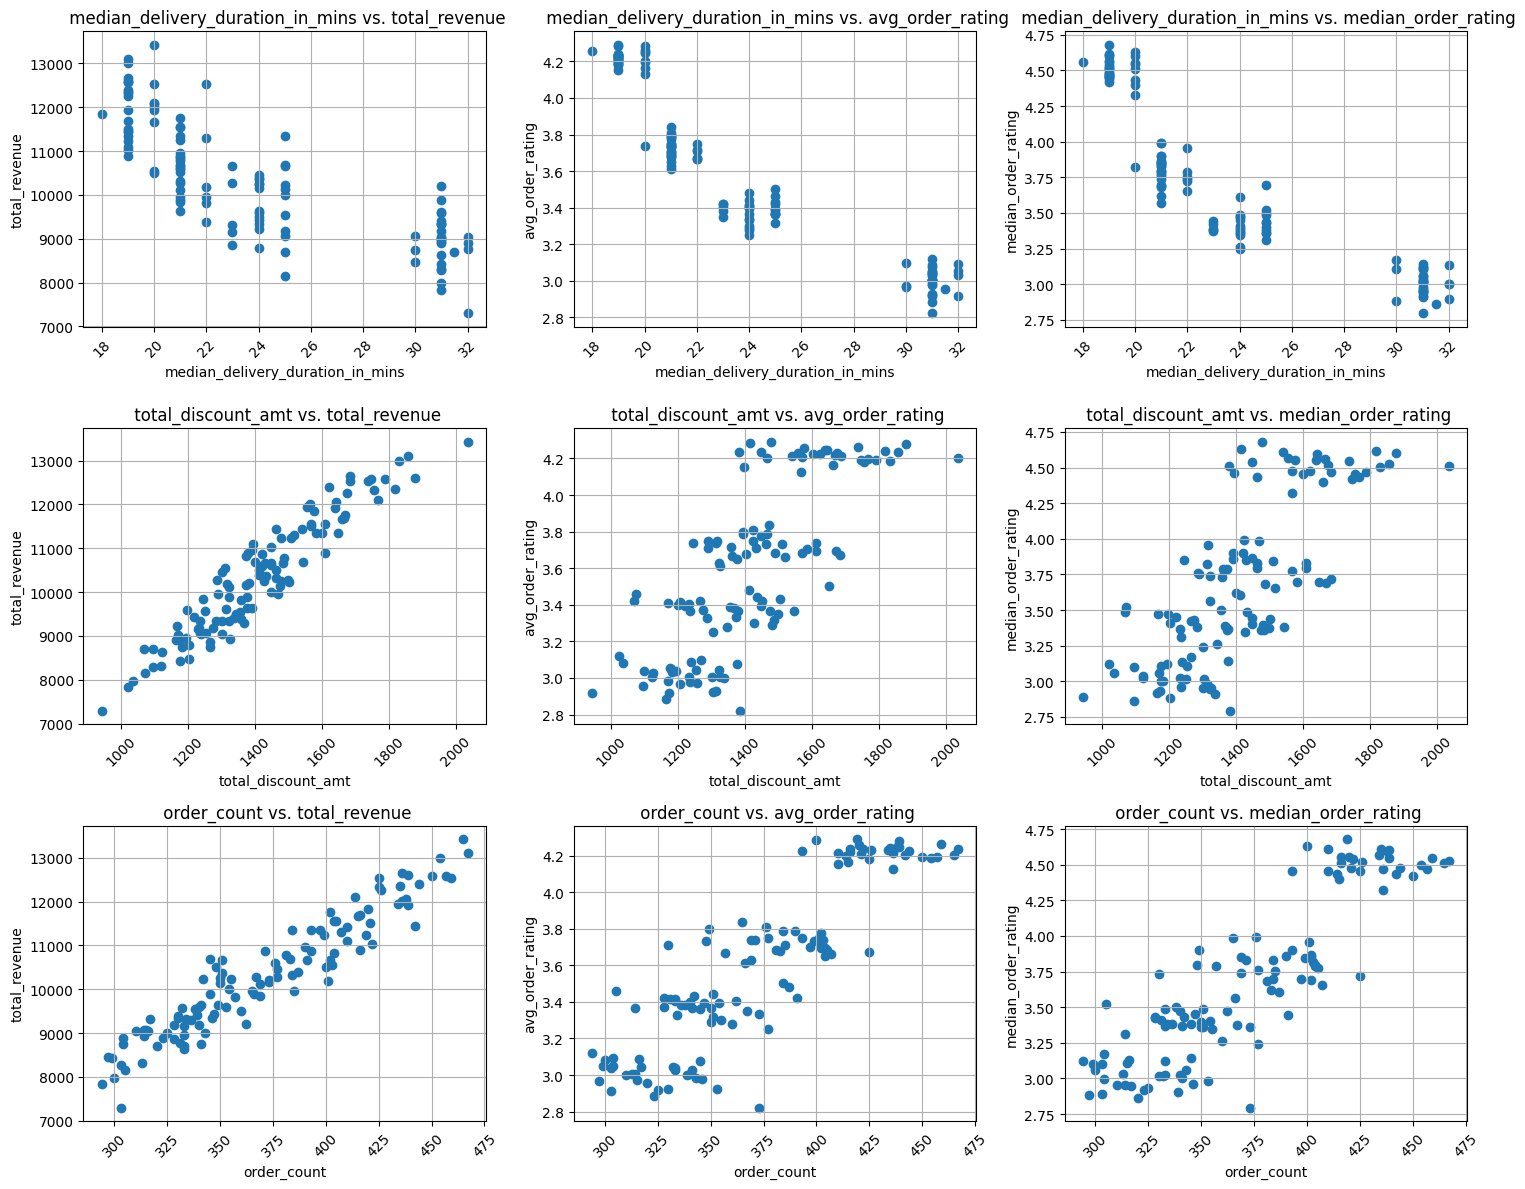

In [21]:
fig, axes = plt.subplots(3, 3, figsize = (15, 12))
axes = axes.flatten()
columns = orders_derived.columns
i = 0
for column_x in columns[1:4]:
    for column_y in columns[4:7]:
        axes[i].scatter(orders_derived[column_x], orders_derived[column_y])
        axes[i].set_title(f' {column_x} vs. {column_y}')
        axes[i].set_xlabel(f'{column_x}')
        axes[i].set_ylabel(f'{column_y}')
        axes[i].grid(True)
        axes[i].tick_params(axis='x', rotation=45)
        i+=1
plt.tight_layout()
plt.show()

In [22]:
print(f'Correlation between delivery duration and order count : {Karl_Pearson_Correlation(orders_derived.avg_delivery_duration_in_mins, orders_derived.order_count)}')
print(f'Correlation between delivery duration and total revenue : {Karl_Pearson_Correlation(orders_derived.avg_delivery_duration_in_mins, orders_derived.total_revenue)}')
print(f'Correlation between delivery duration and order count : {Karl_Pearson_Correlation(orders_derived.median_delivery_duration_in_mins, orders_derived.order_count)}')
print(f'Correlation between delivery duration and total revenue : {Karl_Pearson_Correlation(orders_derived.median_delivery_duration_in_mins, orders_derived.total_revenue)}')

Correlation between delivery duration and order count : -0.8197597568635026
Correlation between delivery duration and total revenue : -0.795137372065989
Correlation between delivery duration and order count : -0.8187053966751713
Correlation between delivery duration and total revenue : -0.7910958275480263


In [23]:
print(f'Correlation between discount and order count : {Karl_Pearson_Correlation(orders_derived.total_discount_amt, orders_derived.order_count)}')
print(f'Correlation between discount and total revenue : {Karl_Pearson_Correlation(orders_derived.total_discount_amt, orders_derived.total_revenue)}')

Correlation between discount and order count : 0.8428918864478689
Correlation between discount and total revenue : 0.9467748190822217


In [24]:
print(f'Correlation between discount and order count : {Karl_Pearson_Correlation(orders_derived.avg_delivery_duration_in_mins, orders_derived.avg_order_rating)}')
print(f'Correlation between discount and total revenue : {Karl_Pearson_Correlation(orders_derived.total_discount_amt, orders_derived.avg_order_rating)}')
print(f'Correlation between discount and order count : {Karl_Pearson_Correlation(orders_derived.avg_delivery_duration_in_mins, orders_derived.median_order_rating)}')
print(f'Correlation between discount and total revenue : {Karl_Pearson_Correlation(orders_derived.total_discount_amt, orders_derived.median_order_rating)}')

Correlation between discount and order count : -0.9300601197079358
Correlation between discount and total revenue : 0.7591062523773221
Correlation between discount and order count : -0.8985856705349734
Correlation between discount and total revenue : 0.7570564960451268


### Causation

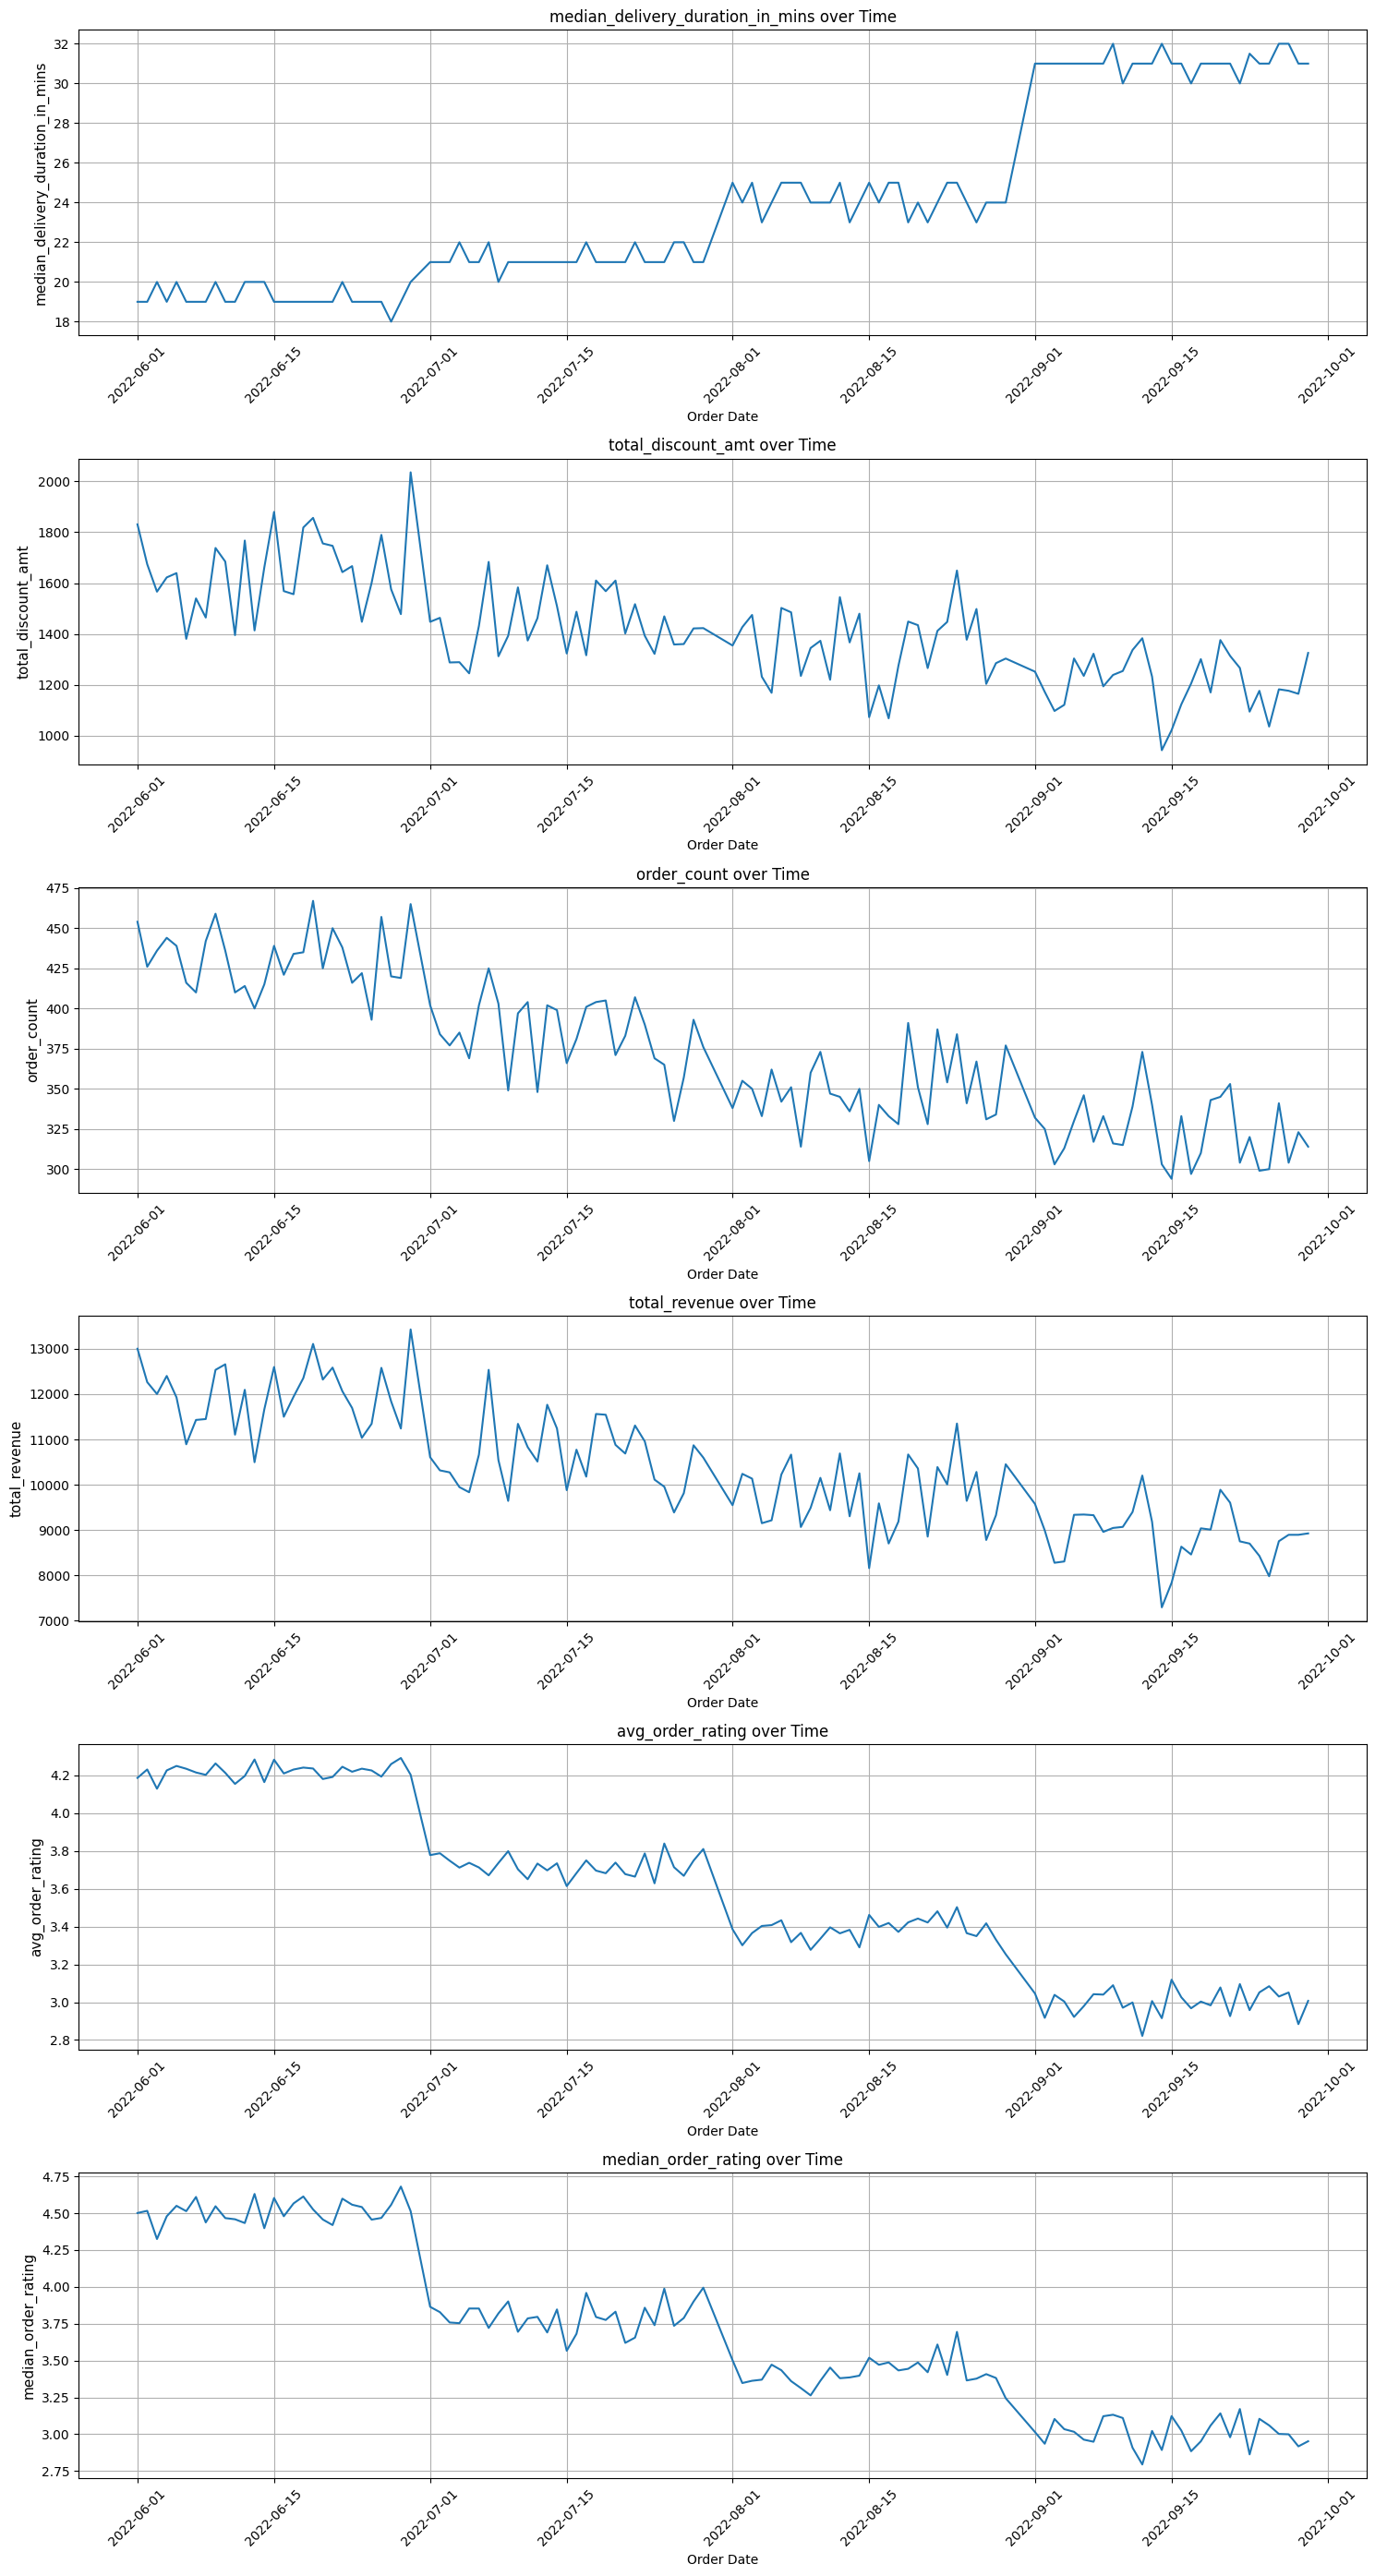

In [25]:
fig, axes = plt.subplots(6, 1, figsize = (15, 28))
axes = axes.flatten()
for i, column in enumerate(orders_derived.columns[1:8]):
    axes[i].plot(orders_derived.index, orders_derived[column])
    axes[i].set_title(f"{column} over Time", fontsize=12)
    axes[i].set_xlabel("Order Date", fontsize=10)
    axes[i].set_ylabel(column, fontsize=11)
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [47]:
def stationaryTest():
    pass
def grangerCausalityTest():
    pass
def transferEntropy():
    pass
def causality():
    pass

In [48]:
grangercausalitytests(orders_derived[['order_count', 'avg_delivery_duration_in_mins']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=28.7233 , p=0.0000  , df_denom=112, df_num=1
ssr based chi2 test:   chi2=29.4927 , p=0.0000  , df=1
likelihood ratio test: chi2=26.2541 , p=0.0000  , df=1
parameter F test:         F=28.7233 , p=0.0000  , df_denom=112, df_num=1


{np.int64(1): ({'ssr_ftest': (np.float64(28.723303730353063),
    np.float64(4.522340286572049e-07),
    np.float64(112.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(29.49267793741609),
    np.float64(5.612834903556582e-08),
    np.int64(1)),
   'lrtest': (np.float64(26.25412121208001),
    np.float64(2.9931539644854914e-07),
    np.int64(1)),
   'params_ftest': (np.float64(28.723303730354797),
    np.float64(4.5223402865688445e-07),
    np.float64(112.0),
    1.0)},
   array([[0., 1., 0.]])])}